In [1]:
import scanpy as sc
#import scvi

In [2]:
# Reading the file and creating an adata object
#file = 'GSE67835_CPM_log10.tsv'
file = '/home/ljcw1/PycharmProjects/SRP/GSE67835_CPM_named_clean.tsv'
adata = sc.read_text(file, delimiter='\t').T 
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
adata

AnnData object with n_obs × n_vars = 466 × 46766

In [4]:
results_file = 'brain.h5ad' 

# Preprocessing

In [5]:
# Doublet removal <- this didnt work so well, so I'm going to move on
# sc.pp.filter_genes(adata, min_cells=10)
# scvi.model.SCVI.setup_anndata(adata)
# vae = scvi.model.SCVI(adata)
# vae.train()


# solo = scvi.external.SOLO.from_scvi_model(vae)
# solo.train()


normalizing counts per cell
    finished (0:00:00)


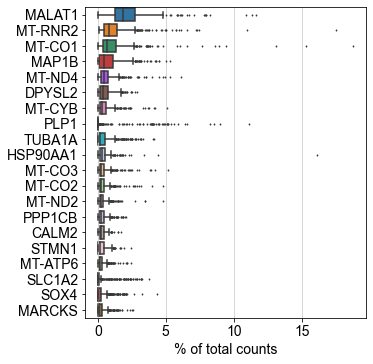

In [6]:
# Visualisation of the top 20 highest expresses genes
sc.pl.highest_expr_genes(adata, n_top=20, )

In [7]:
# This can be used to find the cell and gene names
# adata.var_names
# adata.obs_names

In [8]:
# Simple filtering 
#sc.pp.filter_cells(adata, min_genes=200)
#sc.pp.filter_genes(adata, min_cells=3)

In [9]:
# Adds a column with a boolean whether a mitochrondrial gene is present
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [10]:
# Visualising the genes which are mitochondrial
adata.var[adata.var.mt == True]

,mt
MT-ATP6,True
MT-ATP8,True
MT-CO1,True
MT-CO2,True
MT-CO3,True
MT-CYB,True
MT-ND1,True
MT-ND2,True
MT-ND3,True
MT-ND4,True


In [11]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [12]:
adata

AnnData object with n_obs × n_vars = 466 × 46766
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

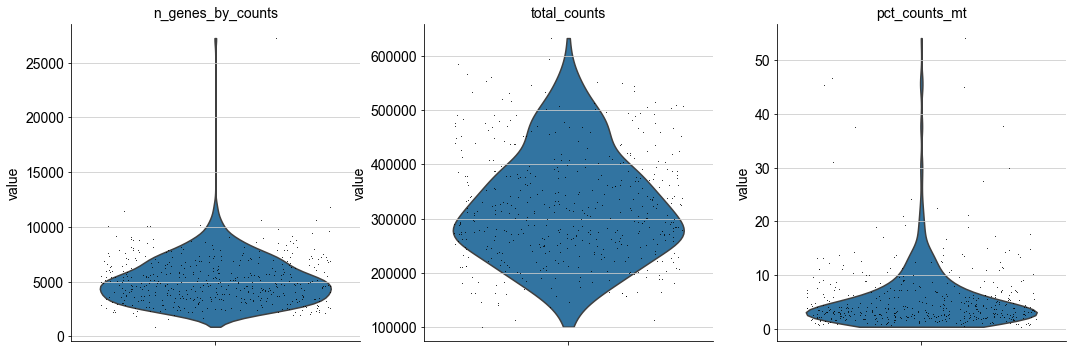

In [13]:
# Violin plots for number of genes expressed in the matrix, total counts per cell and % counts in mt cells
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [14]:
# Identifying the cell that has over 50% mitochondrial genes
adata.obs[adata.obs.pct_counts_mt > 50]

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
SRR1974727,6215,300123.78125,162458.9375,54.130642


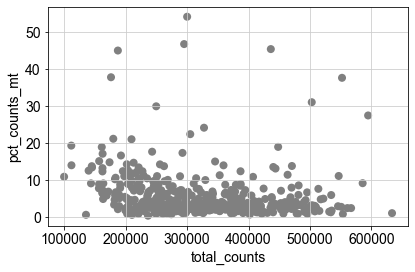

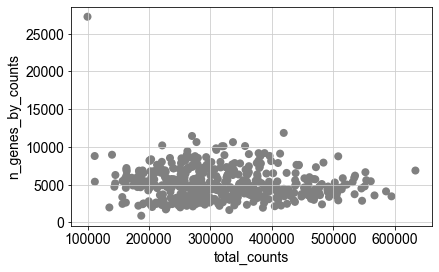

In [15]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [16]:
# Selecting genes that have a % mitochondrial count of 10%
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [17]:
sc.pp.log1p(adata)

/home/ljcw1/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
# Highly variable genes using default calues

sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor='seurat_v3')


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/home/ljcw1/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


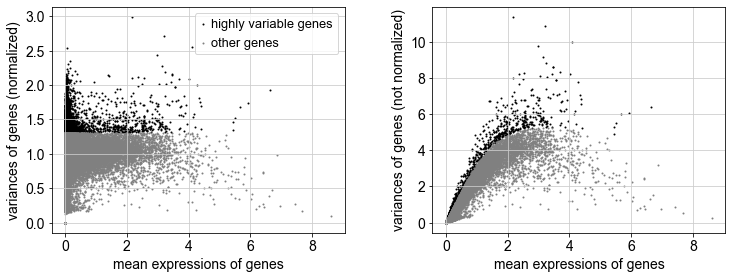

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,highly_variable_rank,means,variances,variances_norm
A1CF,False,13,1.040758,97.210300,484.993408,True,461.0,0.042687,0.164142,1.697853
A2M,False,120,67.567497,74.248927,31486.453125,True,617.0,0.814049,3.424923,1.646555
A2M-AS1,False,11,0.990853,97.639485,461.737305,True,1591.0,0.056433,0.194762,1.484840
A2MP1,False,43,3.251089,90.772532,1515.007568,True,3253.0,0.229555,0.803247,1.348981
AASS,False,236,119.654556,49.356223,55759.023438,True,373.0,2.130118,6.591555,1.737369
...,...,...,...,...,...,...,...,...,...,...
ZSCAN20,False,20,1.814577,95.708155,845.592834,True,1337.0,0.106040,0.392182,1.515074
ZSCAN32,False,71,8.588867,84.763948,4002.412109,True,3915.0,0.396861,1.369104,1.313190
ZSCAN9,False,50,7.184987,89.270386,3348.203857,True,3648.0,0.307139,1.067425,1.326268
ZSWIM3,False,16,1.161117,96.566524,541.080566,True,1733.0,0.075286,0.262829,1.468707


In [19]:
sc.pl.highly_variable_genes(adata)
adata.var[adata.var.highly_variable]

In [20]:
adata.raw = adata

In [21]:
# Filtering out the genes that aren't highly variable
adata = adata[:, adata.var.highly_variable]

In [22]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:05)


In [23]:
sc.pp.scale(adata, max_value=0)

# Principal Component Analysis

In [24]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


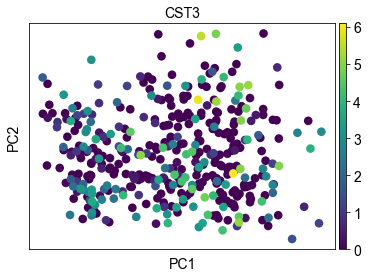

In [25]:
sc.pl.pca(adata, color='CST3')

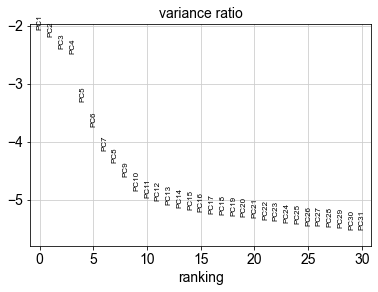

In [26]:
sc.pl.pca_variance_ratio(adata, log=True)

In [27]:
adata.write(results_file)

In [28]:
adata

AnnData object with n_obs × n_vars = 403 × 4000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [29]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40


/home/ljcw1/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [30]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:01)


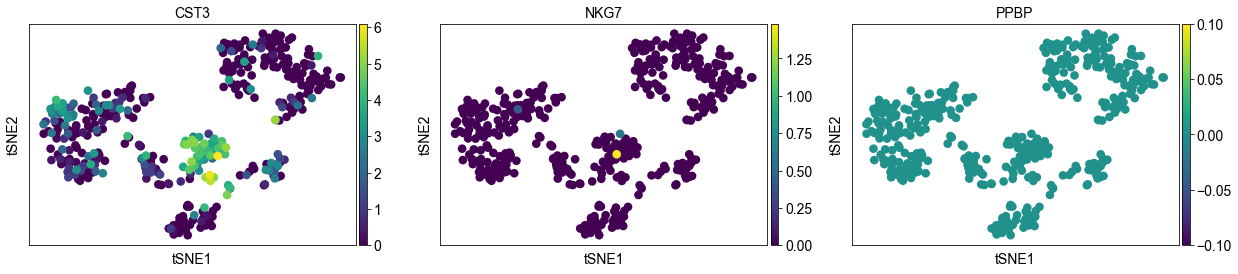

In [31]:
sc.pl.tsne(adata, color=['CST3', 'NKG7', 'PPBP'])

In [32]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


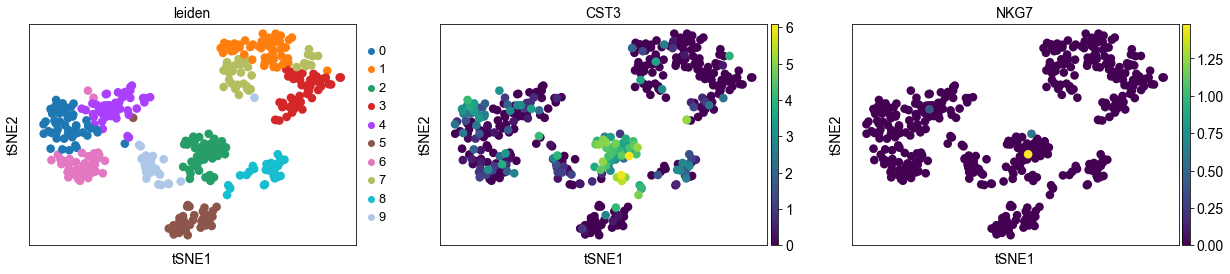

In [33]:
sc.pl.tsne(adata, color=['leiden', 'CST3', 'NKG7'])